# kaggle - 타이타닉 생존자 예측

**Competition background**
RMS 타이타닉의 침몰은 역사상 가장 악명 높은 참사 중 하나입니다.     
1912 년 4 월 15 일, 첫 항해 도중 타이타닉은 빙산과 충돌 한 후 침몰하였고, 이로 인해 2224 명의 승객과 승무원 중 1502 명이 사망했습니다. 
이 비극은 국제 사회에 큰 충격을 주었고, 선박 안전 규정을 개선하는 계기가 되었습니다.             

많은 사망자가 생긴 이유 중 하나는 승객과 승무원을위한 구명정이 충분하지 않았기 때문입니다.      
침몰에서 살아남는 데는 여러 요소가 있었겠지만, 여성, 어린이 및 상류층과 같은 특정 그룹의 사람들이 생존 가능성이 더 컸습니다.           

이 컴퍼티션에서 우리는 어떤 부류의 사람들이 생존 할 가능성이 높았던 지에 대해 분석을 하고, 이를 기반으로 하여 머신러닝 모델을 만든 뒤 승선한 사람들의 생존유무를 예측합니다.        

**Goal**
타이타닉 참사에 탑승객의 생존 유무를 예측하는 것이 목적입니다.     
        
**Metric**
리더보드 랭킹 점수는 얼마나 정확하게 생존을 예측 했는지로 매겨지며, score 는 accuracy(정확도) 입니다.       
       
        
**File descriptions**
train.csv - 예측 모델을 만들기 위해 사용하는 학습셋입니다. 각 탑승객의 신상정보와 ground truth(생존유무)가 주어지며, 신상정보 및 파생변수를 토대로 생존유무를 예측하는 모델을 만듭니다.        
test.csv - 학습셋으로 만든 모델을 가지고 예측할 탑승객 정보가 담긴 테스트셋입니다.        
sampleSubmission.csv - 제출시 사용할 수 있는 csv 파일입니다.      
        
**Data fields**           
survival - 생존유무, target 값. (0 = 사망, 1 = 생존)            
pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)        
sex - 성별       
Age - 나이(세)       
sibsp - 함께 탑승한 형제자매, 배우자 수 총합         
parch - 함께 탑승한 부모, 자녀 수 총합       
ticket - 티켓 넘버       
fare - 탑승 요금      
cabin - 객실 넘버        
embarked - 탑승 항구        

In [1]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 1.5)

import missingno as msno

%matplotlib inline

In [2]:
# data 불러오기
df_train = pd.read_csv('./2019-1st-ml-month-with-kakr/train.csv')
df_test = pd.read_csv('./2019-1st-ml-month-with-kakr/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Null data check

## 컬럼별 null 비율 확인

In [6]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'\
    .format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'\
    .format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


## 컬럼별 null data 시각화: Missingno(msno) 라이브러리

- msno.matrix
    - 데이터 셋이 크면, sampling 개수 지정해서 요약 시각화 가능  ex. df_train.sample(250) #250개
    - 최대 50개의 레이블이 지정된 열만 요약해서 표시해줌
    - 시계열 데이터를 다룬다면, 시간의 주기성을 지정하는 매개변수 옵션 추가 설정해줘야함

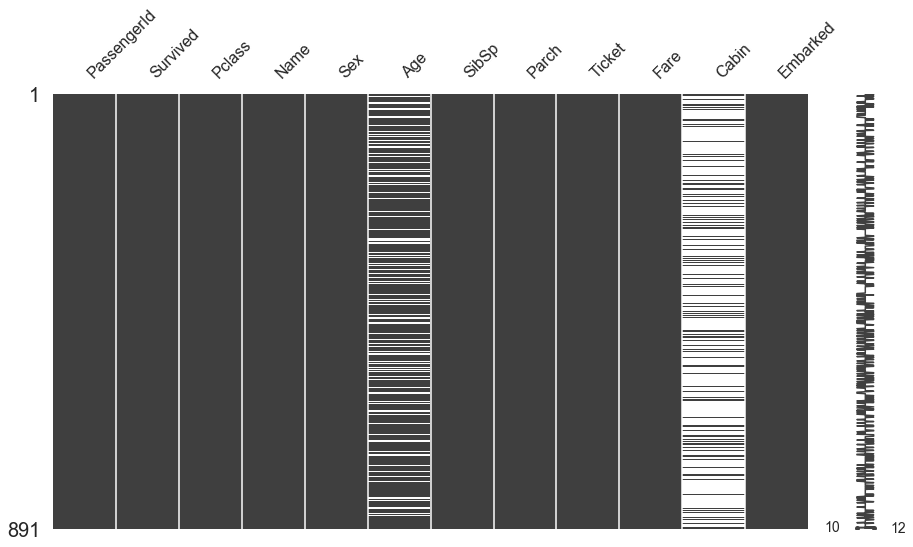

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(15,8))

- msno.bar
    - 결측치가 합해진 값을 보여주는 막대그래프
    - log=True 매개변수 지정해서, 로그 스케일로 전환할 수도 있음

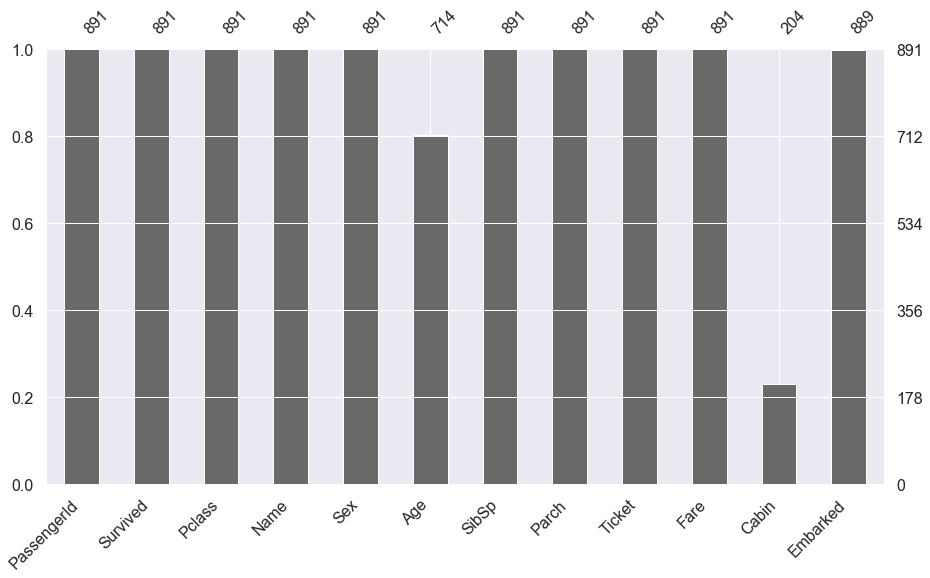

In [9]:
msno.bar(df=df_train.iloc[:,:], figsize = (15,8))

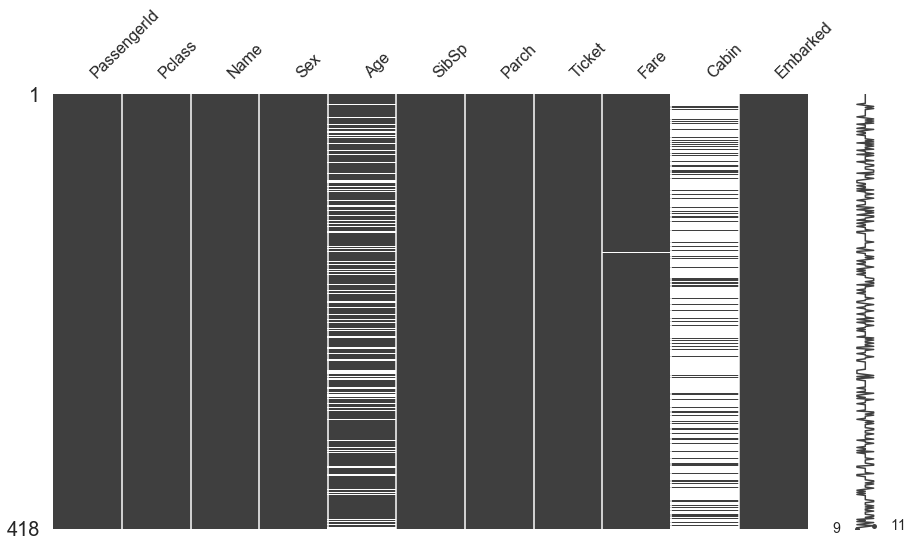

In [10]:
msno.matrix(df=df_test.iloc[:, :], figsize=(15,8))

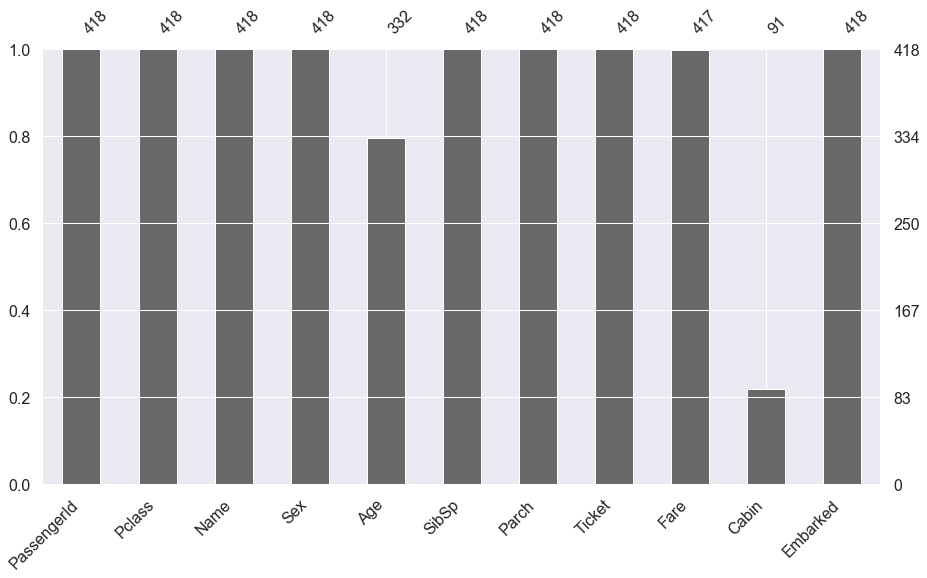

In [11]:
msno.bar(df=df_test.iloc[:,:], figsize = (15,8))

# Target label 확인
- 생존자가 0,1로 구분되어있음. 이러한 binary classification 문제의 경우, 0과 1의 분포에 따라 모델 평가 방법이 달라질 수 있어서 확인이 필요함

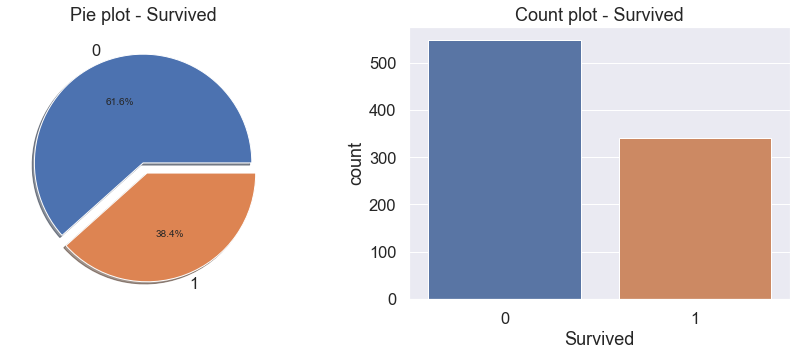

In [12]:
f, ax = plt.subplots(1,2, figsize=(15,5))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 이 데이터의 target label 분포가 나름 균일함 (크게 치우치지는 않음)
    - 예) 100개중 1이 1개인 경우가 문제가 됨

# EDA(Exploratory Data Analysis)

## Pclass별 생존률
- 티켓 class: 순서가 있는 범주형 타입

In [13]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


- pandas의 crosstab 이용하면, 위 두개를 더 쉽게 볼수 있음

In [15]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 각 Pclass별 생존률

In [16]:
# 각 Pclass별 생존률
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()  

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


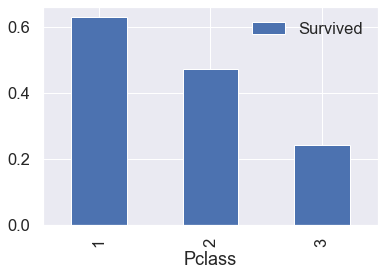

In [17]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar()

    - 상위 Pclass일 수록(1st), 생존률이 높음 

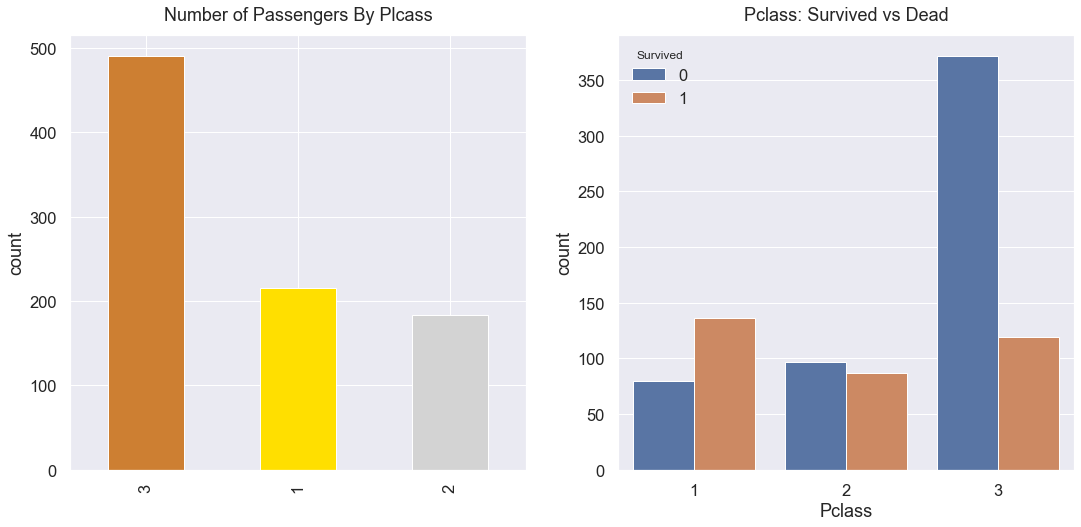

In [18]:
# seaborn의 countplot이용 => 특정 label에 따른 개수 확인
y_position = 1.02
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Plcass', y=y_position)
ax[0].set_ylabel('count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

    - Pclass가 높을 수록 생존확률 높음(1: 63%, 2: 48%, 3: 25%)
    - 따라서, 생존 여부에 Pclass가 큰 영향을 미칠 것이라 유추해볼 수 있음 (feature로 사용해야함)

## gender 별 생존률

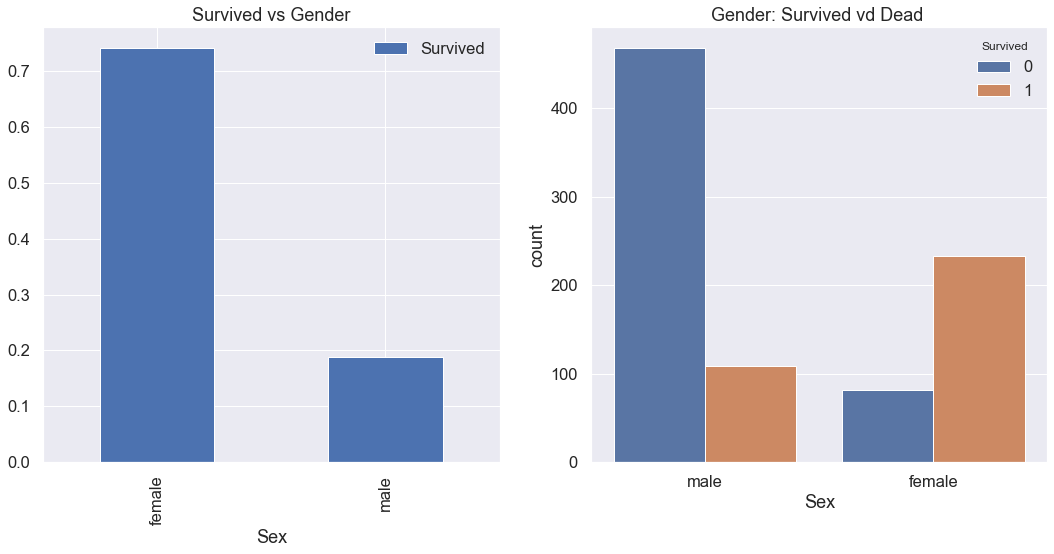

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Gender')

sns.countplot('Sex', hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Gender: Survived vd Dead ')
plt.show()

    - 여성의 생존 확률이 더 높음

In [20]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


    - 성별에 따른 생존률이 크게 차이가 나기 때문에. 중요한 feature인 것을 알 수 있음

## Both Gender and Pclass

- seaborn의 factorplot을 이용 => 3개의 차원 그래프 쉽게 그릴 수 있음

C:\Users\14Z960-GR30K\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\14Z960-GR30K\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


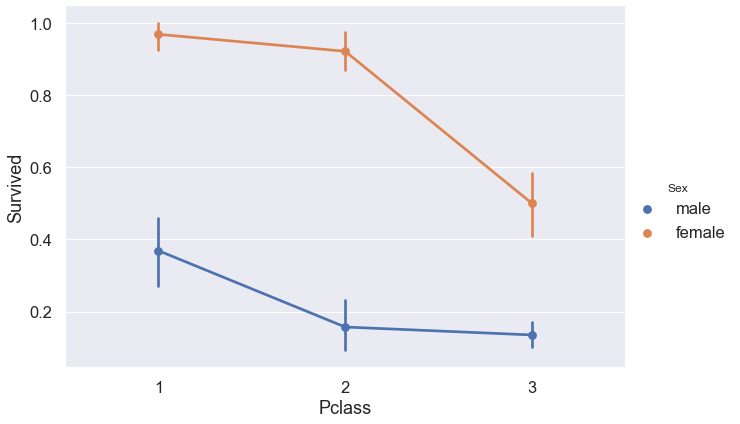

In [22]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size = 6, aspect=1.5)

    - 모든 클래스에서 여성이 살 확률이 남성보다 높다
    - 남녀 둘다 클래스가 높아질 수록, 살 확률이 높다

## Age

In [23]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

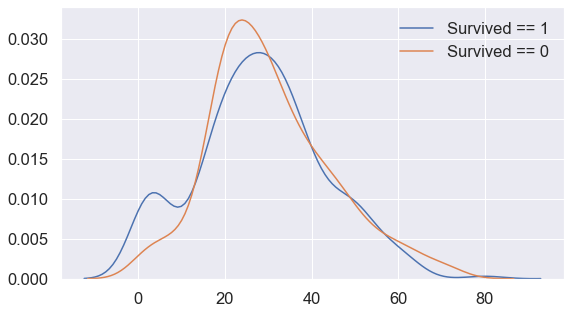

In [24]:
# 셍존 여부에 따른 age. histogram
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1','Survived == 0'])
plt.show()

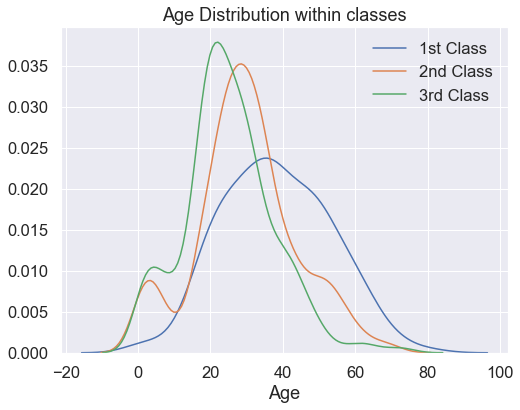

In [25]:
# 생존에 따른 age와 class 분포
fig, ax = plt.subplots(1, 1, figsize=(8,6))

sns.kdeplot(df_train['Age'][df_train['Pclass'] == 1], ax=ax)
sns.kdeplot(df_train['Age'][df_train['Pclass'] == 2], ax=ax)
sns.kdeplot(df_train['Age'][df_train['Pclass'] == 3], ax=ax)

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

    - class가 높을 수록, 고연령층 비중이 커짐

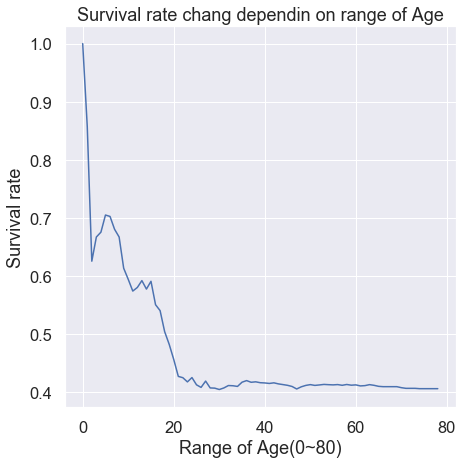

In [26]:
# 생존률 
cummulate_survival_ratio = []
for i in range(1, 80):      # 나이 min/max 범위
    # 나이별 생존 합 / 해당 나이 길이(개수) = 나이별 생존률
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate chang dependin on range of Age', y = 1)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~80)')
plt.show()

    - 나이가 어릴수록 생존률이 높음
    - 나이가 중요한 feature인 것 확인

## Pclass, gender, Age

- seaborn의 violinplot

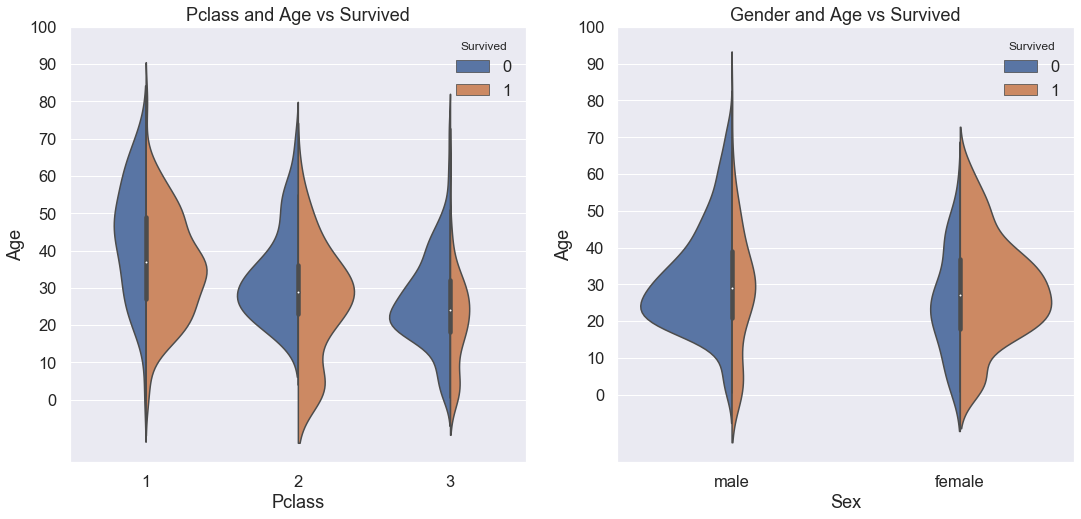

In [27]:
# 3가지 특성에 따른 생존여부
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age', hue='Survived', data=df_train, scale='count',split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Gender and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

    - 모든 클래스에서 나이가 어릴수록 생존한 사람이 많음
    - 여성, 아이 우선

## Embarked
- 탑승한 항구에 따른 생존률

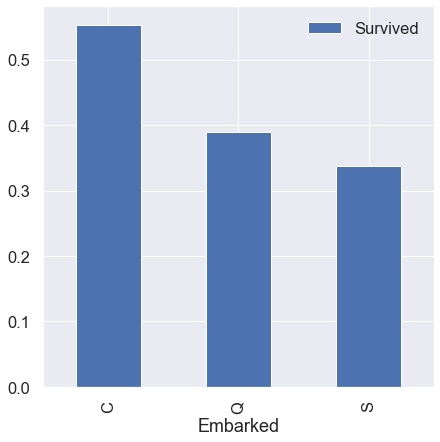

In [28]:
f, ax = plt.subplots(1,1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

    - 큰 차이는 보이지 않지만, C의 생존률이 가장 높음
    - 이 feature가 중요할지 아닐지 애매... 일단 넣고, 추후에(모델 만든 후) 중요도 계산해보기!

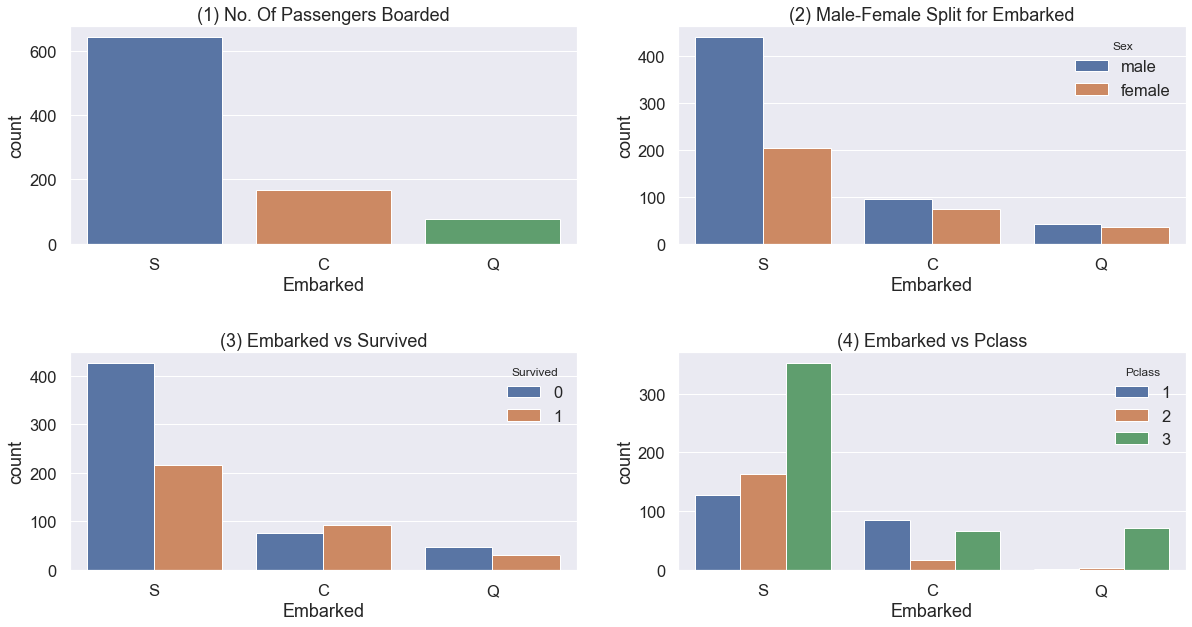

In [29]:
f, ax=plt.subplots(2,2, figsize=(20,10))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')


sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

    - S 항구에서 가장 많은 사람이 탑승.
    - S 항구의 남성 탑승자 비율이 높음 (다른 항구는 비슷)
    - S 항구의 생존비율이 가장 낮음
    - C 항구에서 1st class 사람이 많아서, 생존 확률이 높았던 것임. 
    - 그리고 S항구는 3rd class 탑승자 + 남성 탑승자 비율이 높아서, 생존 확률이 가장 낮았던 것임.

## Family - SibSp(형재 자매) + Parch(부모, 자녀)
- family로 합쳐서 분석

In [30]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  # +1: 자기 자신도 포함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1  # +1: 자기 자신도 포함

In [31]:
df_train['FamilySize'].describe()  # min: 1, max: 11

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

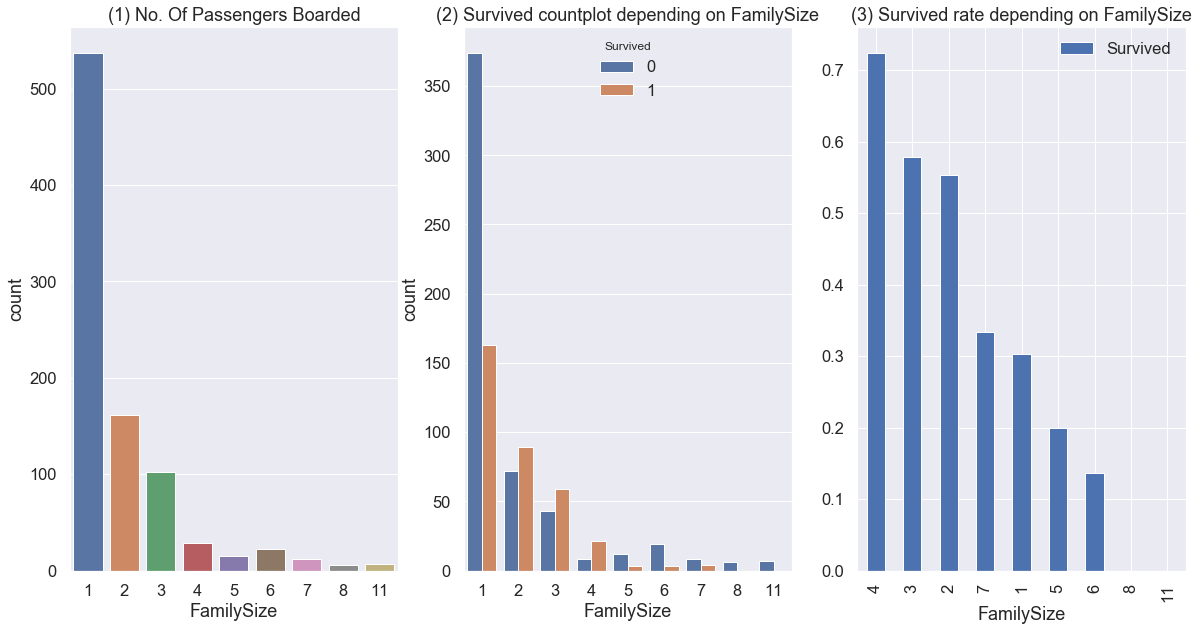

In [32]:
# FamilySize와 생존 관계
f, ax = plt.subplots(1,3, figsize=(20,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y= 1.0)

sns.countplot('FamilySize', hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y= 1.0)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y= 1.0)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


    - familysize 중 1명이 대부분이며, 그 다음으로 2, 3, 4 크기 순으로 많음
    - 가족이 4명인 경우의 생존 확률이 가장 높음. 가족수가 너무 커도(5,6,7,8,11), 작아도(1) 생존 확률이 낮음. 2~4명 선에서 생존확률이 높음

## Fare
- 탑승 요금 분포 확인

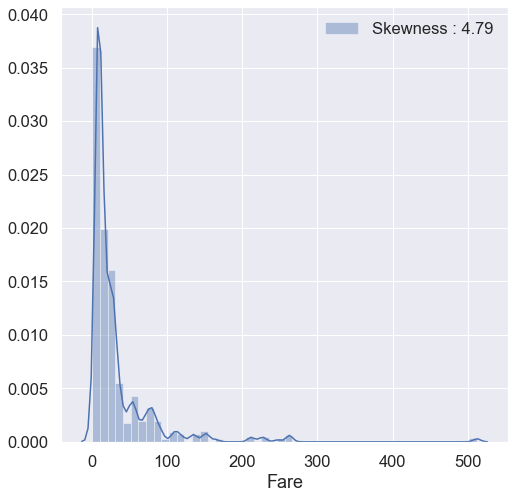

In [33]:
# histogram
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')  # legend가 놓일 최적화 위치 알아서 찾아서 보여줌

    - 분포가 매우 비대칭. 낮은 요금에 몰려있음. outlier도 존재
    - 이러한 비대칭성, 이상치는 모델 성능에 악영향을 줌
    =====> outlier의 영향을 줄이기 위해 log 변환 필요

In [34]:
# test set에 있는 nan 값을 평균값으로 대체
# 나중에 모델 예측할때 문제가 되는 듯? 13강에 설명 있다고함
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [35]:
# 0에 로그를 씌우면, 무한 로그가 되기 때문에
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

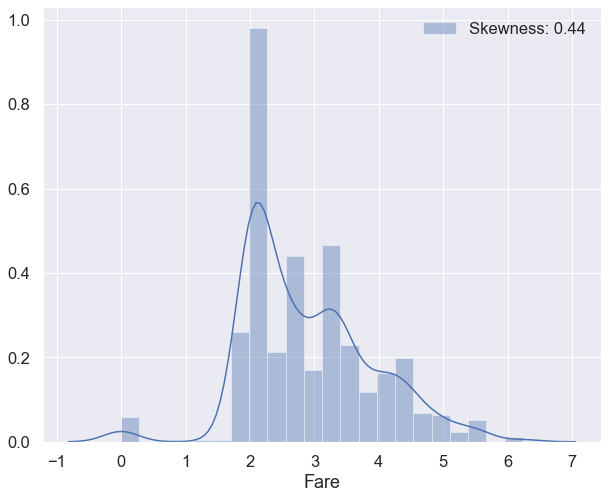

In [36]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc = 'best')

    - log 취하니, 비대칭성이 많이 사라짐
    - 이러한 작업으로, 모델의 성능을 높이는데 기여할 수 있음
    => 원래는 feature engineering part에 들어가는 작업임

## Cabin
- nan 값이 약 80% => 너무 많은 정보가 유실되었기/없기 때문에, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지 않음     
=> 모델에 포함하지 않을 것

In [37]:
(df_train['Cabin'].isnull().sum() / df_train.shape[0])*100

77.10437710437711

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


## Ticket
- nan값은 없으나, string data임

In [39]:
df_train['Ticket'].value_counts()

CA. 2343            7
347082              7
1601                7
CA 2144             6
3101295             6
                   ..
330979              1
2624                1
12233               1
33638               1
STON/O2. 3101282    1
Name: Ticket, Length: 681, dtype: int64

    - 종류가 681개로 매우 다양함
    - 어떤 정보/특징을 이끌어내서, 생존과 연결시킬 수 있을까?

# Feature engineering
- 모델 학습시키기 위해 or 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것

## Fill Null
- null을 포함하는 feature의 statistics를 고려하거나, 다른 아이디어로 null 채우기
- **train뿐만 아니라, test도 똑같이 적용해주어야한다**
    - 하지만, train을 보고 test도 동일한 방식으로 바꿔는 것이며, **항상 test 를 unseen 으로 둔 상태로 놔둬야 한다는 것을 잊지 말아야함.**
    - **train 에서 얻은 statistics 를 기반으로 test 의 null data 를 채워줘야 함.**

**train**
- Age	 Percent of NaN value: 19.87%
- Cabin	 Percent of NaN value: 77.10%
- Embarked	 Percent of NaN value: 0.22%              
           
**test**
- Age	 Percent of NaN value: 20.57%
- Fare	 Percent of NaN value: 0.24%  -> 아까 Fare 부분에서 null 채워줬음
- Cabin	 Percent of NaN value: 78.23%

### Fill Null in Age using title
- 그냥 age의 평균을 사용하는 것이 아니라, title에 따른 age 평균으로 null 채울 것임
    - title: Miss, Mrr, Mrs.. 등

In [40]:
print(df_train['Age'].isnull().sum())
print(df_test['Age'].isnull().sum())

177
86


#### title

In [41]:
df_train['Name'].value_counts()

Hocking, Mrs. Elizabeth (Eliza Needs)    1
Andrew, Mr. Edgardo Samuel               1
Panula, Master. Eino Viljami             1
Andreasson, Mr. Paul Edvin               1
Gillespie, Mr. William Henry             1
                                        ..
Jonkoff, Mr. Lalio                       1
Connolly, Miss. Kate                     1
Shellard, Mr. Frederick William          1
Collander, Mr. Erik Gustaf               1
Nicola-Yarred, Miss. Jamila              1
Name: Name, Length: 891, dtype: int64

In [42]:
# 문자변형(str) 후, 정규 표현식 적용(extract)
# 알파벳 뒤에 .이오는 문자
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [43]:
print(df_train['Initial'].isnull().sum())
df_train['Initial'].value_counts()

0


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Ms            1
Don           1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Lady          1
Name: Initial, dtype: int64

In [44]:
# gender와 initial간의 count 수 보기  (성별에 따라 많이 쓰이는 title 확인)
# crosstab
# T: 행렬 전치
pd.crosstab(df_train['Initial'], df_train['Sex']).style.background_gradient() # (cmap='summer_r')

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### 뒤에 나오는 변환 결과가 이해가 안되서 해봄

In [45]:
tmp = df_train[['Initial', 'Sex']].copy()
tmp['cnt'] = 1
tmp

,Initial,Sex,cnt
0,Mr,male,1
1,Mrs,female,1
2,Miss,female,1
3,Mrs,female,1
4,Mr,male,1
...,...,...,...
886,Rev,male,1
887,Miss,female,1
888,Miss,female,1
889,Mr,male,1


In [46]:
tmp_pivot = pd.pivot_table(tmp, index = ['Initial','Sex'], aggfunc = 'sum')
tmp_pivot

cnt
Initial  Sex        
Capt     male      1
Col      male      2
Countess female    1
Don      male      1
Dr       female    1
         male      6
Jonkheer male      1
Lady     female    1
Major    male      2
Master   male     40
Miss     female  182
Mlle     female    2
Mme      female    1
Mr       male    517
Mrs      female  125
Ms       female    1
Rev      male      6
Sir      male      1

In [48]:
tmp_pivot = tmp_pivot.unstack()
tmp_pivot.fillna(0, inplace=True)
tmp_pivot.columns = ['female', 'male']
tmp_pivot['female'] = tmp_pivot['female'].astype(int)
tmp_pivot['male'] = tmp_pivot['male'].astype(int)
tmp_pivot

,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [49]:
import pandas as pd
sample = pd.DataFrame(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'])
sample = sample.reset_index()
sample.columns = ['result', 'Initial']
sample = sample.set_index('Initial')
sample

,result
Initial,
Mlle,Miss
Mme,Miss
Ms,Miss
Dr,Mr
Major,Mr
Lady,Mrs
Countess,Mrs
Jonkheer,Other
Col,Other


In [50]:
df_merge = pd.merge(tmp_pivot, sample, how = 'left', on = 'Initial')   
df_merge
# Capt, Col 둘다 남자 1,2 => 결과는 Mr, Other로 다름
# Col 뜻이 '대령'이라, 나이 많은 사람으로 추측 => Other로 한듯

,female,male,result
Initial,,,
Capt,0,1,Mr
Col,0,2,Other
Countess,1,0,Mrs
Don,0,1,Mr
Dr,1,6,Mr
Jonkheer,0,1,Other
Lady,1,0,Mrs
Major,0,2,Mr
Master,0,40,NaN


#### 변환

In [51]:
# 위 table 을 참고하여, 남자, 여자가 쓰는 initial의 이름을 Miss, Mrs, Mr, Other로 rename
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [52]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


    - 여성과 관련된 title인 Miss, Mrs의 생존률이 높음

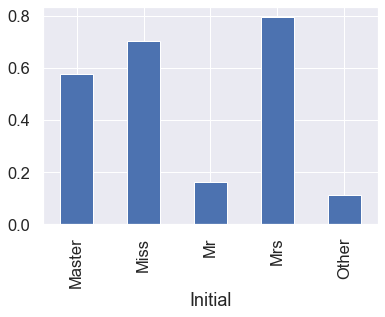

In [53]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

#### Age null 채우기 (using title)

In [54]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


- Initial에 따른 Age 평균
    - Master: 5
    - Miss: 22
    - Mr: 33
    - Mrs: 36
    - Other: 46

In [55]:
# train set
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'), 'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'), 'Age'] = 46

# test set
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'), 'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'), 'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'), 'Age'] = 46

In [56]:
print(df_train['Age'].isnull().sum())
print(df_test['Age'].isnull().sum())

0
0


    - 다른 캐글러들의 결측치 처리방법 더 공부하기!
    - https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 

### Fill Null in Embarked
- null값 2개밖에 없음
- S에서 가장 많은 탑승객이 있었으므로, null값 S로 채우기

In [57]:
print(df_train['Embarked'].isnull().sum())
print(df_test['Embarked'].isnull().sum())

2
0


In [58]:
df_train['Embarked'].fillna('S', inplace=True)

In [59]:
print(df_train['Embarked'].isnull().sum())

0


## Change Age(continuous to categorical)
- 따라치는 타이타닉 튜토리얼 블로그에서는 다양한 방법을 소개하기 위해서, 나이 연속형 변수를 연령대별로 묶어서 카테고리화/범주화해주었음
- 하지만, 연속형 변수를 categorical로 바꾸면 information loss가 생길 수도 있어서, 변형하지 않고 그대로 사용할 예정

In [ ]:
# # 방법 1 
# df_train['Age_cat'] = 0
# df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
# df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
# df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
# df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
# df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
# df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
# df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
# df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

# df_test['Age_cat'] = 0
# df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
# df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
# df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
# df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
# df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
# df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
# df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
# df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [ ]:
# # 방법 2: 함수만들어서, apply로 적용 시키기
# def category_age(x):
#     if x < 10:
#         return 0
#     elif x < 20:
#         return 1
#     elif x < 30:
#         return 2
#     elif x < 40:
#         return 3
#     elif x < 50:
#         return 4
#     elif x < 60:
#         return 5
#     elif x < 70:
#         return 6
#     else:
#         return 7    
    
# df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [ ]:
# 방법 1과 방법 2가 같은 결과를 냈는지 확인
# Series간 boolean 비교 후 all() 메서드 사용
# print((df_train['Age_cat'] == df_train['Age_cat_2']).all())

In [ ]:
# age 컬럼과 쓰지 않을 age_cat or age_cat_2 삭제
# df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
# df_test.drop(['Age'], axis=1, inplace=True)

## string to numerical - Change Initial, Embarked and Sex
- 카테고리/string 데이터를 모델에 인풋으로 넣을 때, 수치화 해줘야함

- map 메서드로 바꾸면 간단

In [60]:
# Initial 변수에 값 종류들을 사전 순서대로 번호 부여해서, 수치화 해주기
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

In [65]:
df_train['Initial'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [69]:
df_train['Initial'].isnull().sum()

0

In [64]:
# Embarked도 C, Q, S의 string 값으로 이루어져 있어서, 수치화 필요
print(df_train['Embarked'].unique())
df_train['Embarked'].value_counts()

['S' 'C' 'Q']


S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [66]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0,'Q':1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0,'Q':1,'S':2})

In [67]:
df_train['Embarked'].unique()

array([2, 0, 1], dtype=int64)

In [68]:
df_train['Embarked'].isnull().sum()

0

In [70]:
# Sex도 Female, male인 string 값으로 이루어져있음 -> 수치화 해주자
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [71]:
df_train['Sex'] = df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

In [72]:
print(df_train['Sex'].unique())
df_train['Sex'].isnull().sum()

[1 0]


0

## Features 간의 상관관계 파악 (heatmap)

In [74]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'Initial'],
      dtype='object')

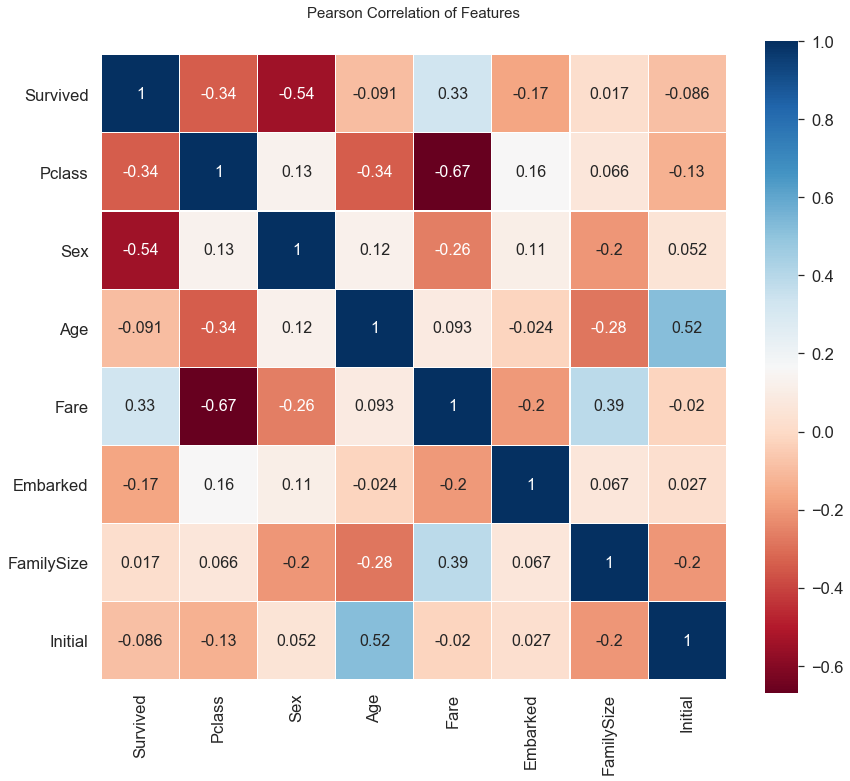

In [76]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize',
       'Initial']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square=True, cmap=colormap, linecolor = 'white', annot=True, annot_kws={'size':16})

del heatmap_data

    - Sex, Pclass가 Survived와 어느정도 상관관계가 있음을 알 수 있음
    - 여기서 얻을 수 있는 추가 정보: 서로 강한 상관관계를 가지는 feature들이 없다는 것
        - 즉, 모델에 불필요한 input feature가 없다는 것을 의미